In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
sns.set()

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# KNR

In [3]:
data = pd.read_json("data/monthly_json.json") 

In [4]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [5]:
GCAG_data=pivot_df['GCAG']

In [6]:
GCAG_data.head()

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
Name: GCAG, dtype: float64

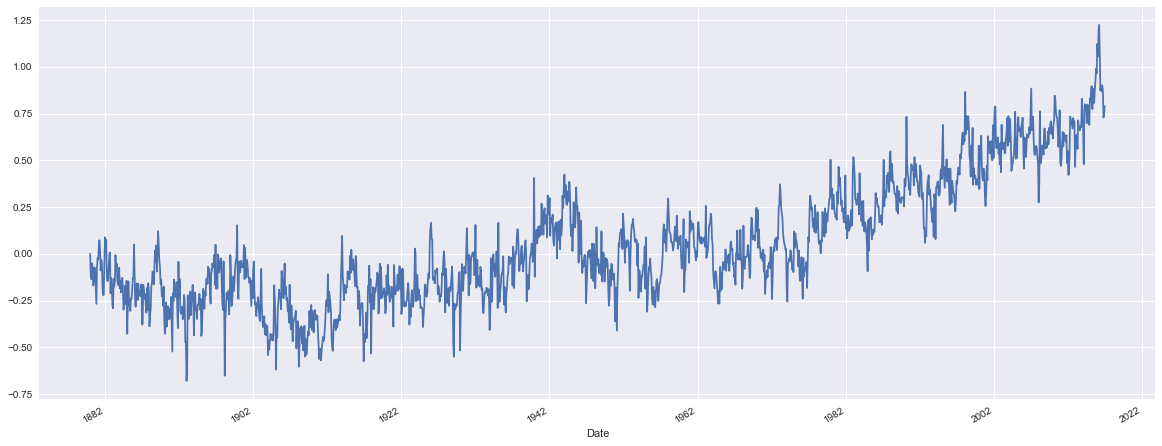

In [7]:
GCAG_data.plot(figsize=(20, 8))

In [8]:
X = GCAG_data.index.values.astype(np.int64) / 1000000

In [9]:
X=X.reshape(-1,1)

In [10]:
type(X)

numpy.ndarray

In [11]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, GCAG_data.values) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [12]:
KNR = neigh.predict(X)

In [13]:
GCAG_df = pd.DataFrame(GCAG_data)

In [14]:
GCAG_df['KNR']= KNR

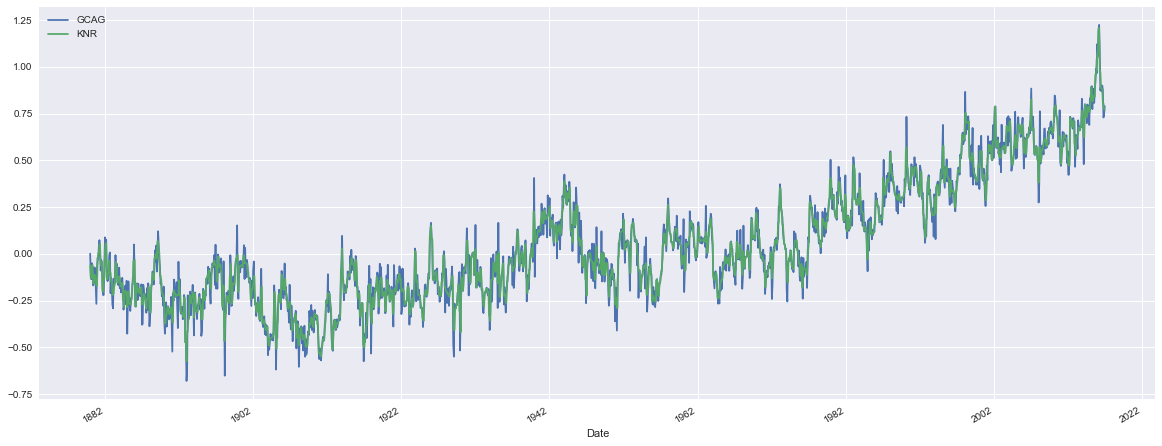

In [15]:
GCAG_df.plot(figsize=(20, 8))

In [16]:
for i in range(1,30):
    anzahl_neighbors = i  
    model = KNeighborsRegressor(n_neighbors=anzahl_neighbors,weights='uniform').fit(X, GCAG_data.values) 
    GCAG_df["k"+str(i)] = model.predict(X)

In [17]:
GCAG_df.head()

,GCAG,KNR,k1,k2,k3,k4,k5,k6,k7,k8,...,k20,k21,k22,k23,k24,k25,k26,k27,k28,k29
Date,,,,,,,,,,,,,,,,,,,,,
1880-01-06,0.0009,-0.06100,0.0009,-0.06100,-0.085900,-0.076900,-0.07628,-0.091767,-0.099957,-0.096525,...,-0.073235,-0.078433,-0.0849,-0.090748,-0.088796,-0.081712,-0.077088,-0.071441,-0.073321,-0.075824
1880-02-06,-0.1229,-0.12930,-0.1229,-0.12930,-0.085900,-0.076900,-0.07628,-0.091767,-0.099957,-0.096525,...,-0.073235,-0.078433,-0.0849,-0.090748,-0.088796,-0.081712,-0.077088,-0.071441,-0.073321,-0.075824
1880-03-06,-0.1357,-0.12930,-0.1357,-0.12930,-0.102833,-0.076900,-0.07628,-0.091767,-0.099957,-0.096525,...,-0.073235,-0.078433,-0.0849,-0.090748,-0.088796,-0.081712,-0.077088,-0.071441,-0.073321,-0.075824
1880-04-06,-0.0499,-0.06185,-0.0499,-0.06185,-0.086467,-0.095575,-0.11030,-0.091767,-0.099957,-0.096525,...,-0.073235,-0.078433,-0.0849,-0.090748,-0.088796,-0.081712,-0.077088,-0.071441,-0.073321,-0.075824
1880-05-06,-0.0738,-0.06185,-0.0738,-0.06185,-0.097633,-0.107150,-0.11554,-0.116767,-0.110443,-0.096525,...,-0.073235,-0.078433,-0.0849,-0.090748,-0.088796,-0.081712,-0.077088,-0.071441,-0.073321,-0.075824


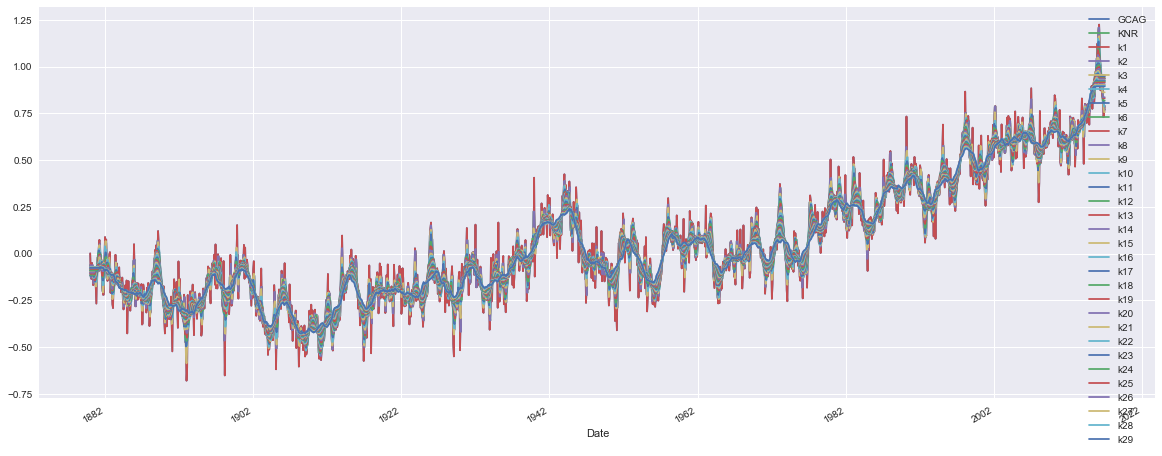

In [18]:
GCAG_df.plot(figsize=(20, 8))

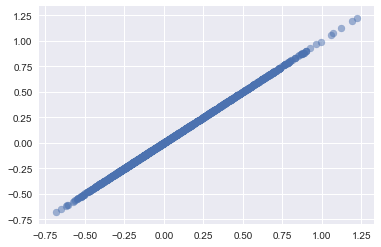

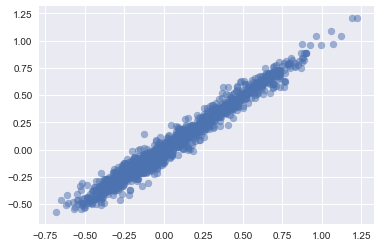

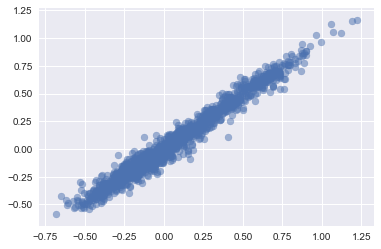

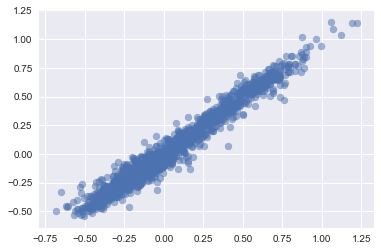

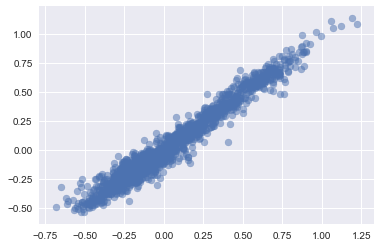

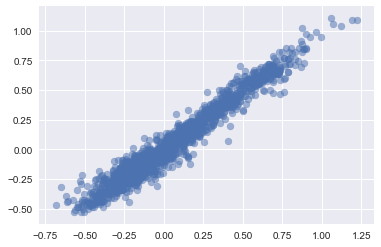

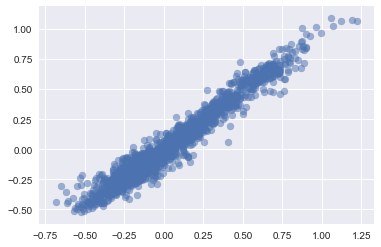

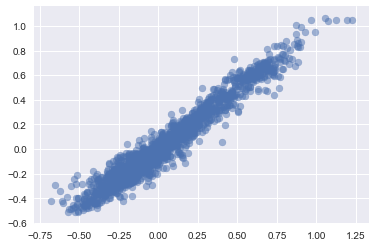

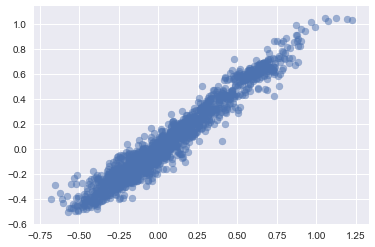

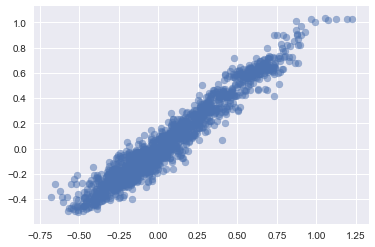

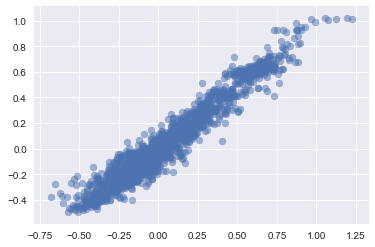

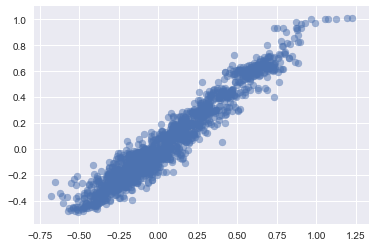

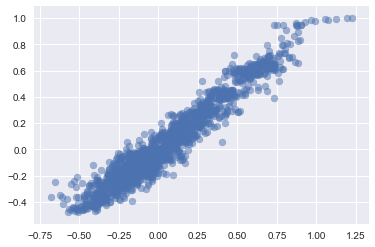

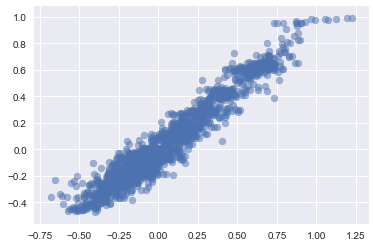

In [19]:
for i in range (1,15):
    plt.scatter(GCAG_df['GCAG'],GCAG_df['k'+str(i)], alpha=0.5)
    plt.show()

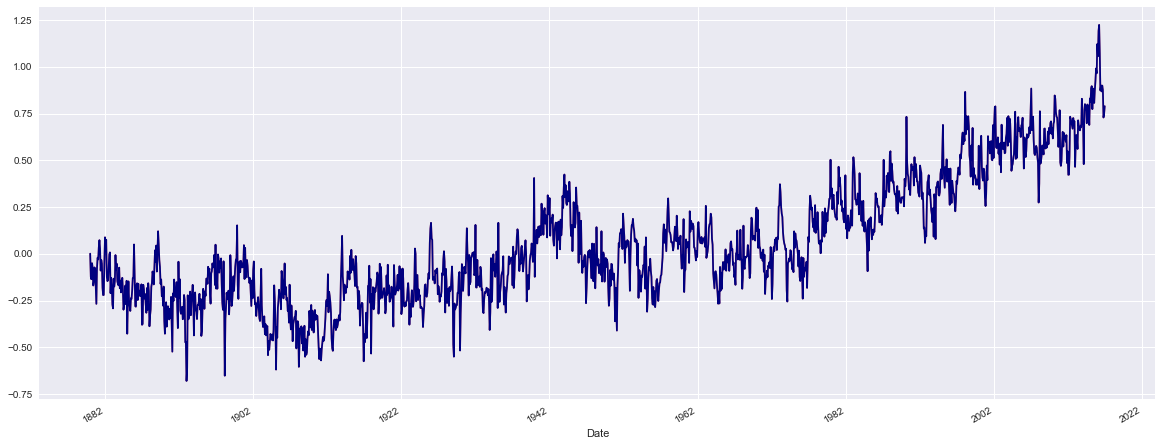

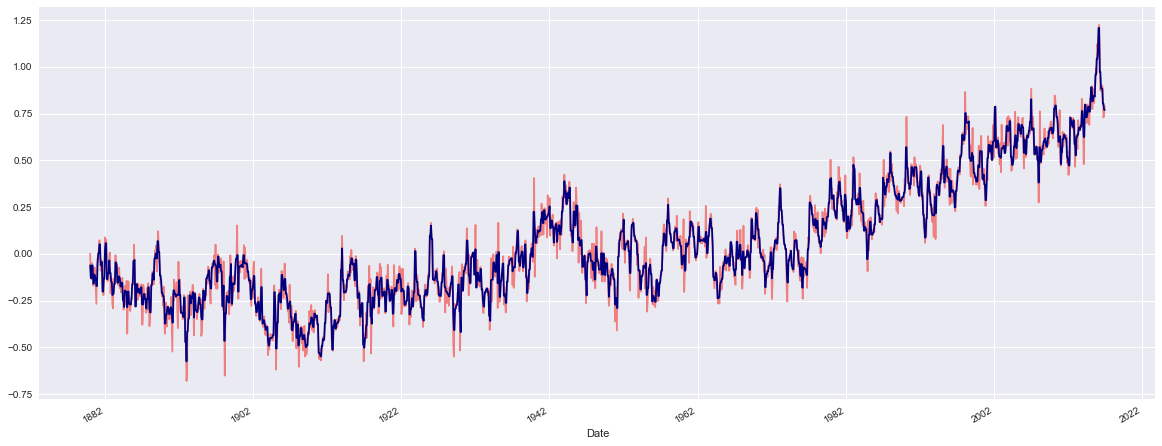

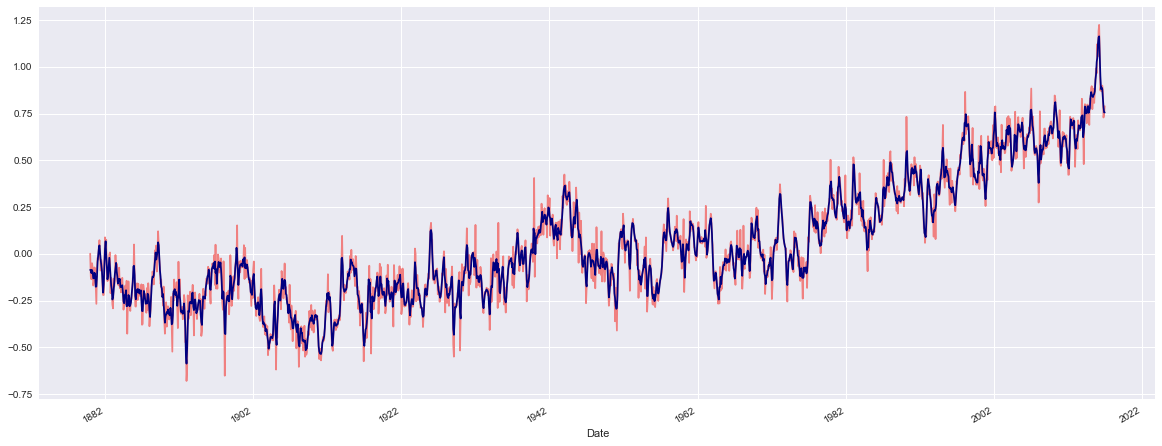

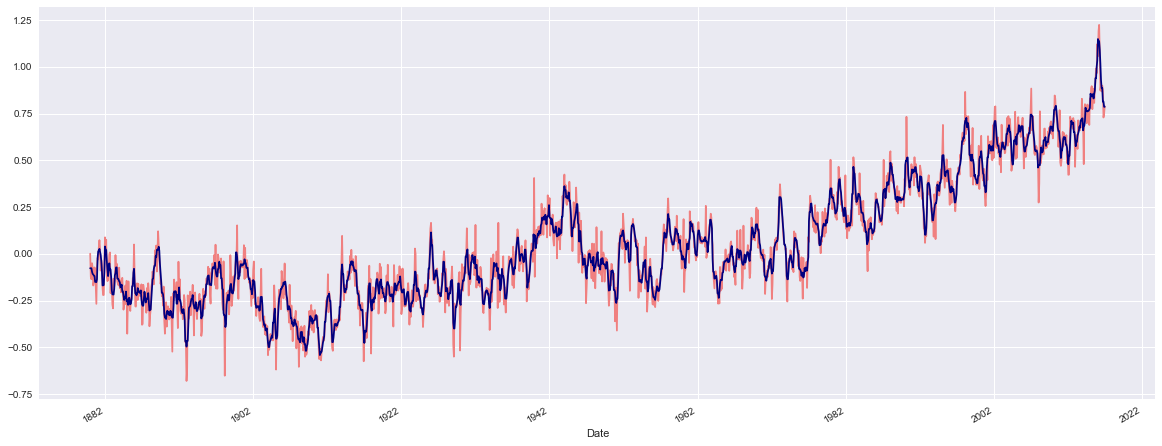

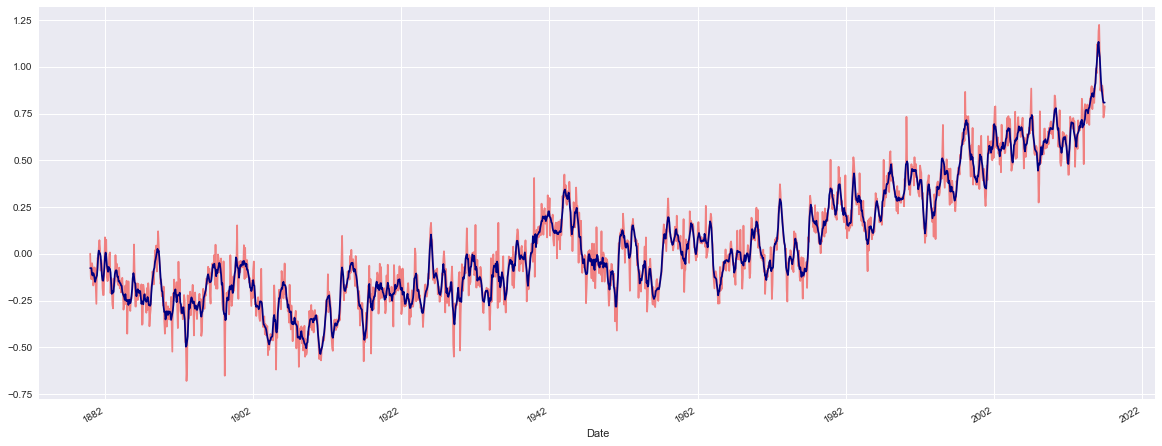

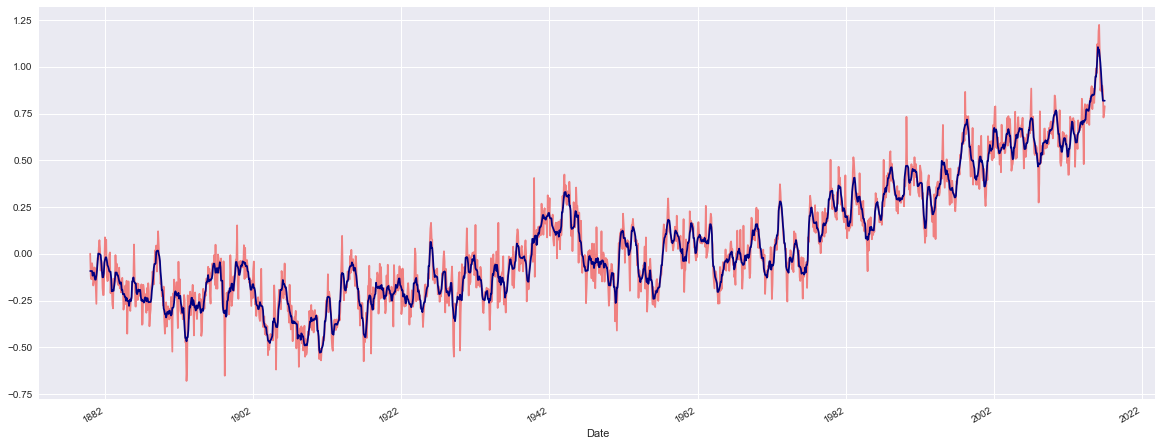

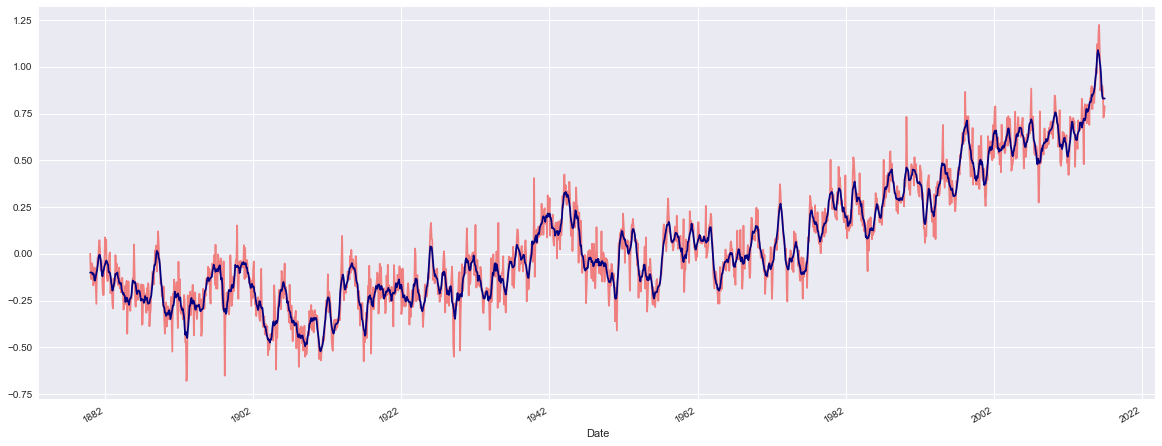

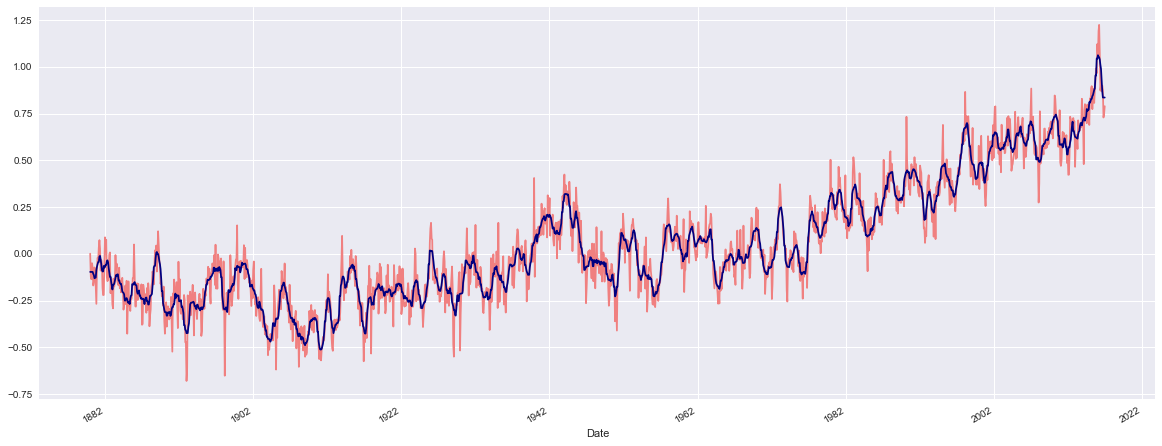

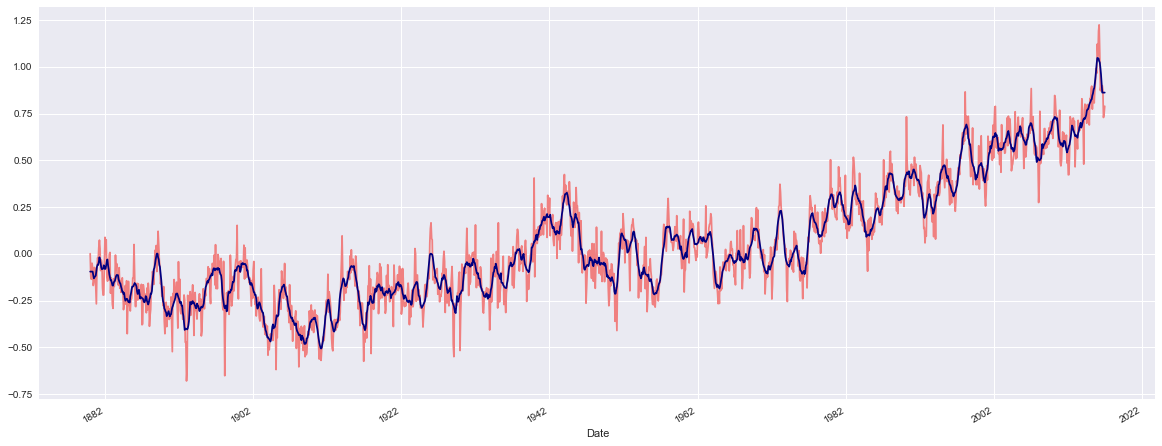

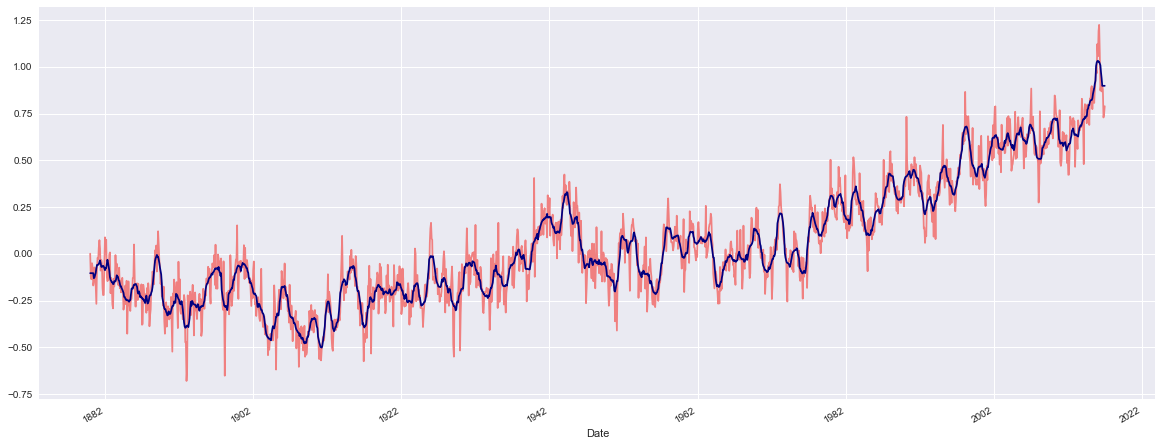

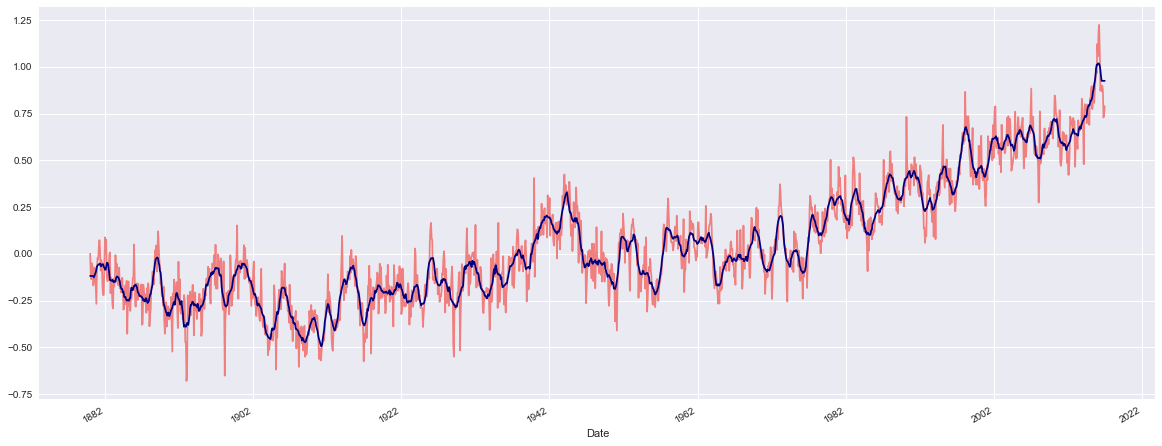

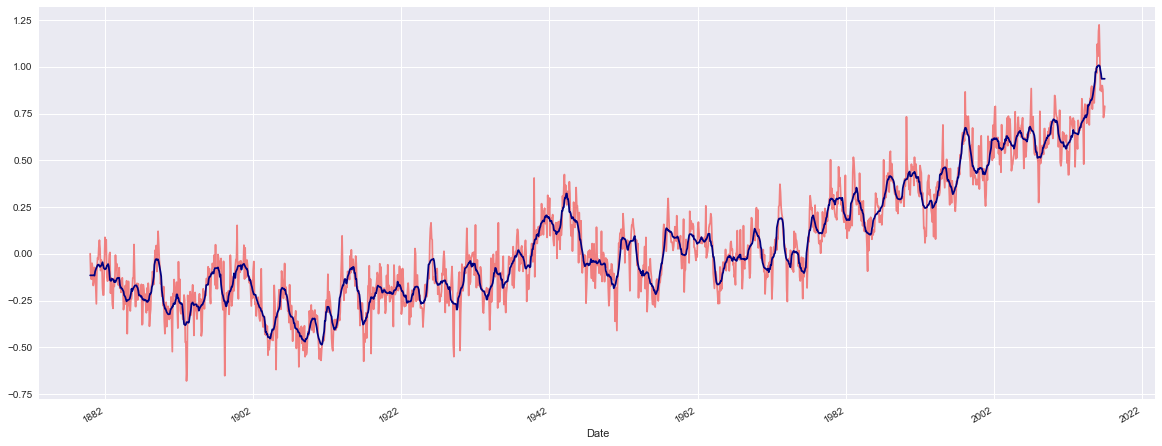

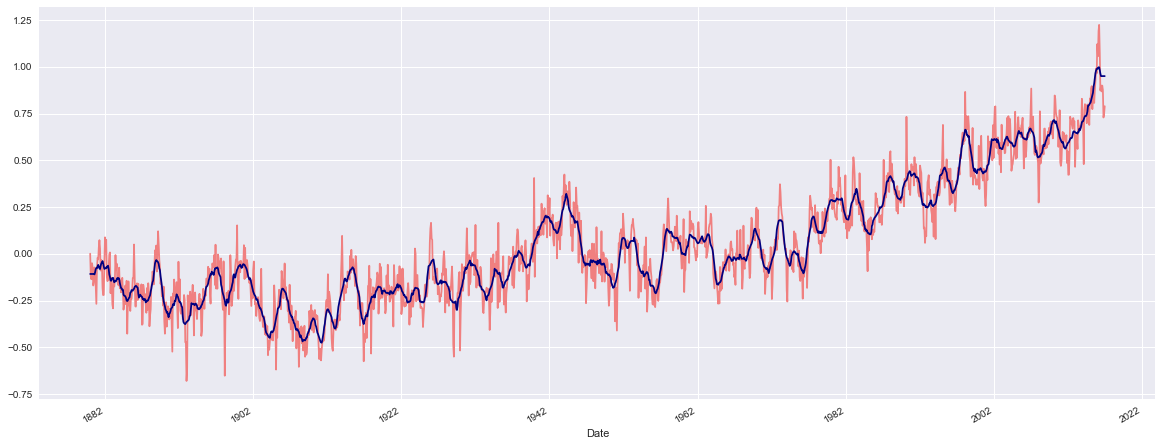

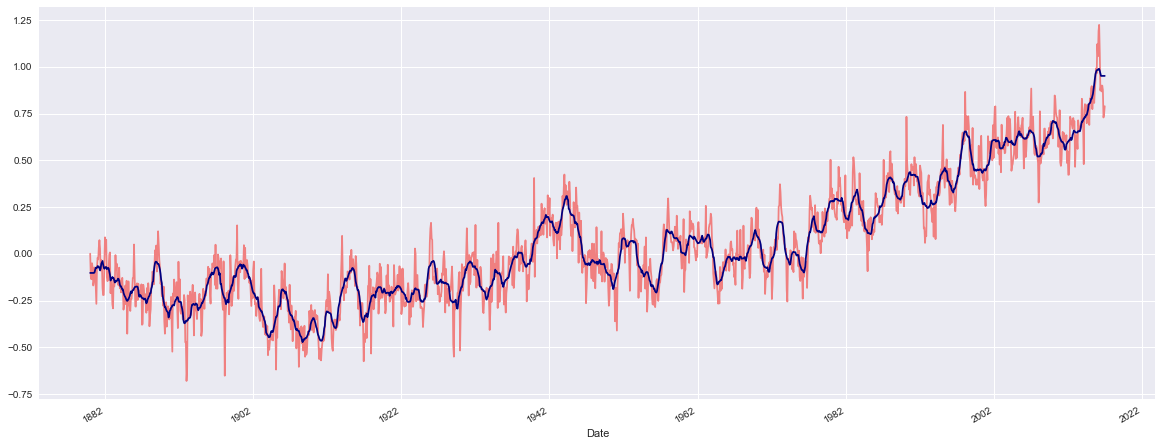

In [20]:
for i in range (1,15):
    plt.title = 'k'+str(i)
    GCAG_df['GCAG'].plot(figsize=(20, 8),color="lightcoral")
    GCAG_df['k'+str(i)].plot(figsize=(20, 8),color="navy")
    plt.show()

# Lineare Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [22]:
GCAG_data2=pivot_df['GCAG']
Xr = GCAG_data2.index.values.astype(np.int64) / 1000000
Xr=Xr.reshape(-1,1)

In [23]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X, GCAG_data.values)
# Make predictions using the training set
GCAG_df2 = pd.DataFrame(GCAG_data)
GCAG_df2["y_pred_Regression"] = regr.predict(X)

In [24]:
regr.coef_

array([2.16128702e-13])

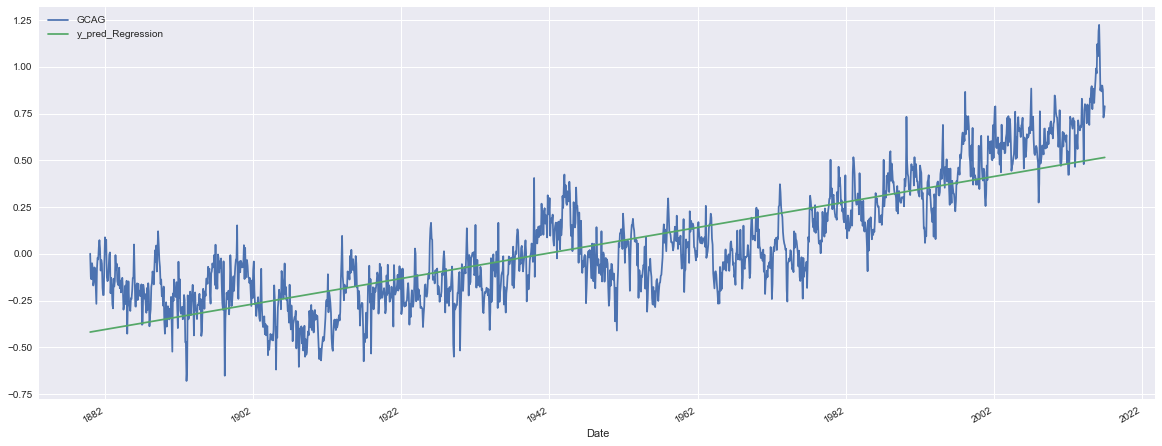

In [25]:
GCAG_df2.plot(figsize=(20, 8))

Hinzunehmen von KNR für neighbors = 2

In [26]:
model = KNeighborsRegressor(n_neighbors=2,weights='uniform').fit(X, GCAG_data.values) 
GCAG_df2["KNR"] = model.predict(X)

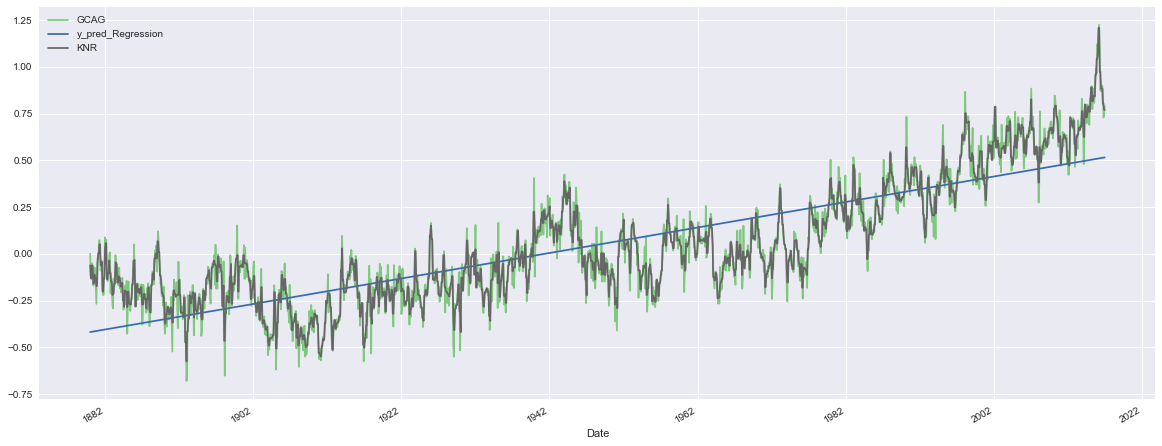

In [27]:
GCAG_df2.plot(figsize=(20, 8),cmap="Accent")

In [28]:
GCAG_df2.head()

,GCAG,y_pred_Regression,KNR
Date,,,
1880-01-06,0.0009,-0.418101,-0.06100
1880-02-06,-0.1229,-0.417522,-0.12930
1880-03-06,-0.1357,-0.416981,-0.12930
1880-04-06,-0.0499,-0.416402,-0.06185
1880-05-06,-0.0738,-0.415841,-0.06185


Berechnung der Fehler bei Testdaten: KNR vs. Lineare Regression

In [29]:
# KNR
print("KNR:")
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GCAG_df2["GCAG"], GCAG_df2["KNR"]))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GCAG_df2["GCAG"], GCAG_df2["KNR"]))

# Lineare Regression
print("Lineare Regression:")
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GCAG_df2["GCAG"], GCAG_df2["y_pred_Regression"]))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GCAG_df2["GCAG"], GCAG_df2["y_pred_Regression"]))

KNR:
Mean squared error: 0.00
Variance score: 0.97
Lineare Regression:
Coefficients: 
 [2.16128702e-13]
Mean squared error: 0.03
Variance score: 0.68


# Aufteilen des Datensatzes Train/Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,GCAG_data.values, test_size=0.33, random_state=42)

## KNR auf den Testdaten

In [32]:
test_df = pd.DataFrame(X_test,columns=['X_test'])
test_df.head()

,X_test
0,-1.054166e+12
1,5.555520e+10
2,1.146874e+12
3,8.498304e+11
4,-1.104106e+12


In [33]:
test_df ['y_test'] = y_test

In [34]:
KNR = KNeighborsRegressor(n_neighbors=2,weights='uniform').fit(X_train, y_train) 
test_df["KNR_y"] = KNR.predict(X_test)
test_df.head()

,X_test,y_test,KNR_y
0,-1.054166e+12,-0.0557,-0.07320
1,5.555520e+10,-0.0763,-0.04430
2,1.146874e+12,0.5499,0.57880
3,8.498304e+11,0.3893,0.32810
4,-1.104106e+12,-0.2894,0.07015


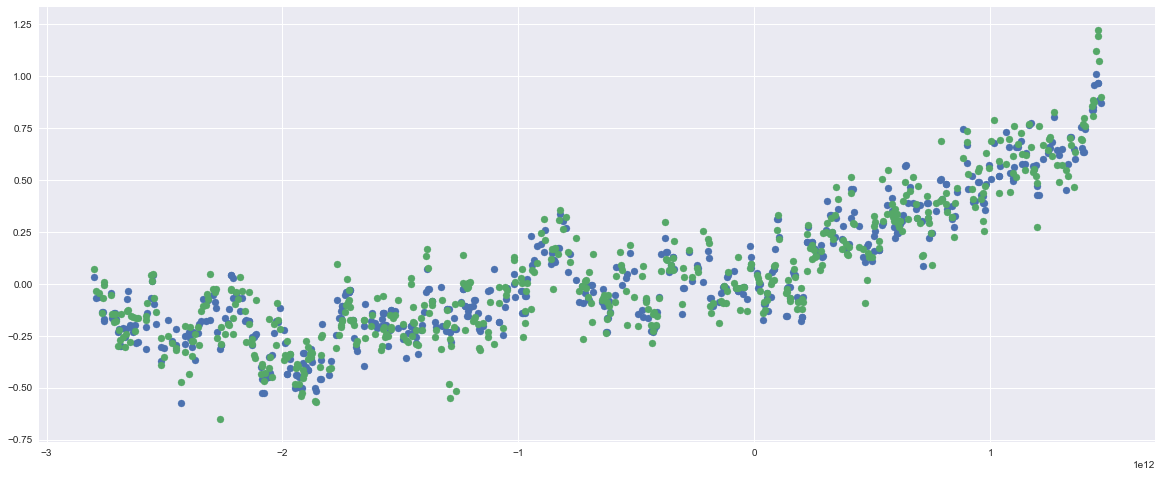

In [35]:
fig = plt.figure(1, figsize=(20, 8))
plt.scatter(x=test_df['X_test'], y=test_df['KNR_y'])
plt.scatter(x=test_df['X_test'], y=test_df['y_test']);


## Hinzufügen der Linearen Regression

In [36]:
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr2.fit(X_train, y_train)
# Make predictions using the test set
test_df["Lineare Regression"] = regr2.predict(X_test)

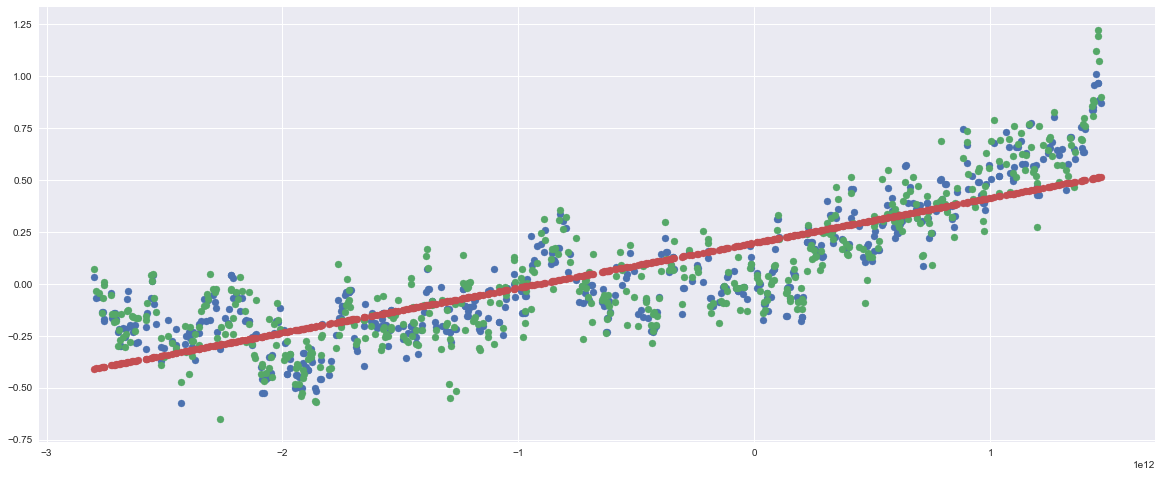

In [37]:
fig = plt.figure(1, figsize=(20, 8))
plt.scatter(x=test_df['X_test'], y=test_df['KNR_y'])
plt.scatter(x=test_df['X_test'], y=test_df['y_test'])
plt.scatter(x=test_df['X_test'], y=test_df['Lineare Regression']);

Berechnung der Fehler bei Testdaten: KNR vs. Lineare Regression

In [38]:
print("KNR:")
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_df['y_test'], test_df['KNR_y']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_df['y_test'], test_df['KNR_y']))

KNR:
Mean squared error: 0.01
Variance score: 0.92


In [39]:
print("Lineare Regression:")
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_df['y_test'], test_df['Lineare Regression']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_df['y_test'], test_df['Lineare Regression']))

Lineare Regression:
Coefficients: 
 [2.16357807e-13]
Mean squared error: 0.03
Variance score: 0.67


Berechnung der Fehler bei den Trainingsdaten: KNR vs. Lineare Regression

In [40]:
train_df = pd.DataFrame(y_train,columns=['y_train'])
train_df ['X_train'] = X_train

In [41]:
KNR = KNeighborsRegressor(n_neighbors=2,weights='uniform').fit(X_train, y_train) 
train_df["KNR_ytrain"] = KNR.predict(X_train)

In [42]:
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr2.fit(X_train, y_train)
# Make predictions using the test set
train_df["Lineare Regression"] = regr2.predict(X_train)
train_df.head()

,y_train,X_train,KNR_ytrain,Lineare Regression
0,-0.2239,-2.029795e+12,-0.22570,-0.242077
1,-0.0116,-1.708992e+12,-0.03095,-0.172669
2,-0.4956,-1.866758e+12,-0.45775,-0.206803
3,-0.0389,-1.051488e+12,-0.03065,-0.030413
4,-0.4136,-2.363645e+12,-0.35075,-0.314308


In [43]:
print("KNR:")
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(train_df['y_train'], train_df['KNR_ytrain']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_df['y_train'], train_df['KNR_ytrain']))

KNR:
Mean squared error: 0.00
Variance score: 0.97


In [44]:
print("Lineare Regression:")
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(train_df['y_train'], train_df['Lineare Regression']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_df['y_train'], train_df['Lineare Regression']))

Lineare Regression:
Coefficients: 
 [2.16357807e-13]
Mean squared error: 0.03
Variance score: 0.69
